In [4]:
! pip install -U layoutparser


Defaulting to user installation because normal site-packages is not writeable


In [5]:
! pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-yda_t6d0/detectron2_ac3ac7b9d6184032941ba60bfa525059
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-yda_t6d0/detectron2_ac3ac7b9d6184032941ba60bfa525059
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done
  Using cached fvcore-0.1.3.post20210317-py3-none-any.whl
  Created wheel for detectron2: filename=detectron2-0.4-cp39-cp39-linux_aarch64.whl size=5708334 sha256=0f12dfc2c3d2652dda0f7453c963bcc707f5eb8046116d7398a31299840a6dae
  Stored in directory: /tmp/pip-ephem-wheel-cache-q2uwelg6/wheels/54/2b/7b/3d70364c8274455445b2611adf7f48be12c7816ffae4e34c8a
Successfull

In [6]:
! pip install layoutparser[ocr]

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.4/918.4 kB 64.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.3
    Uninstalling protobuf-4.22.3:
      Successfully uninstalled protobuf-4.22.3


In [11]:
import cv2
import layoutparser as lp
import os
import random

In [30]:
img_path = "/home/mdscanner/dataset/"+random.choice(os.listdir("/home/mdscanner/dataset"))
print(img_path)
image = cv2.imread(img_path)
image = image[..., ::-1] 


/home/mdscanner/dataset/x76edbacab9e31c5c.md-ursine-polar-4.jpg


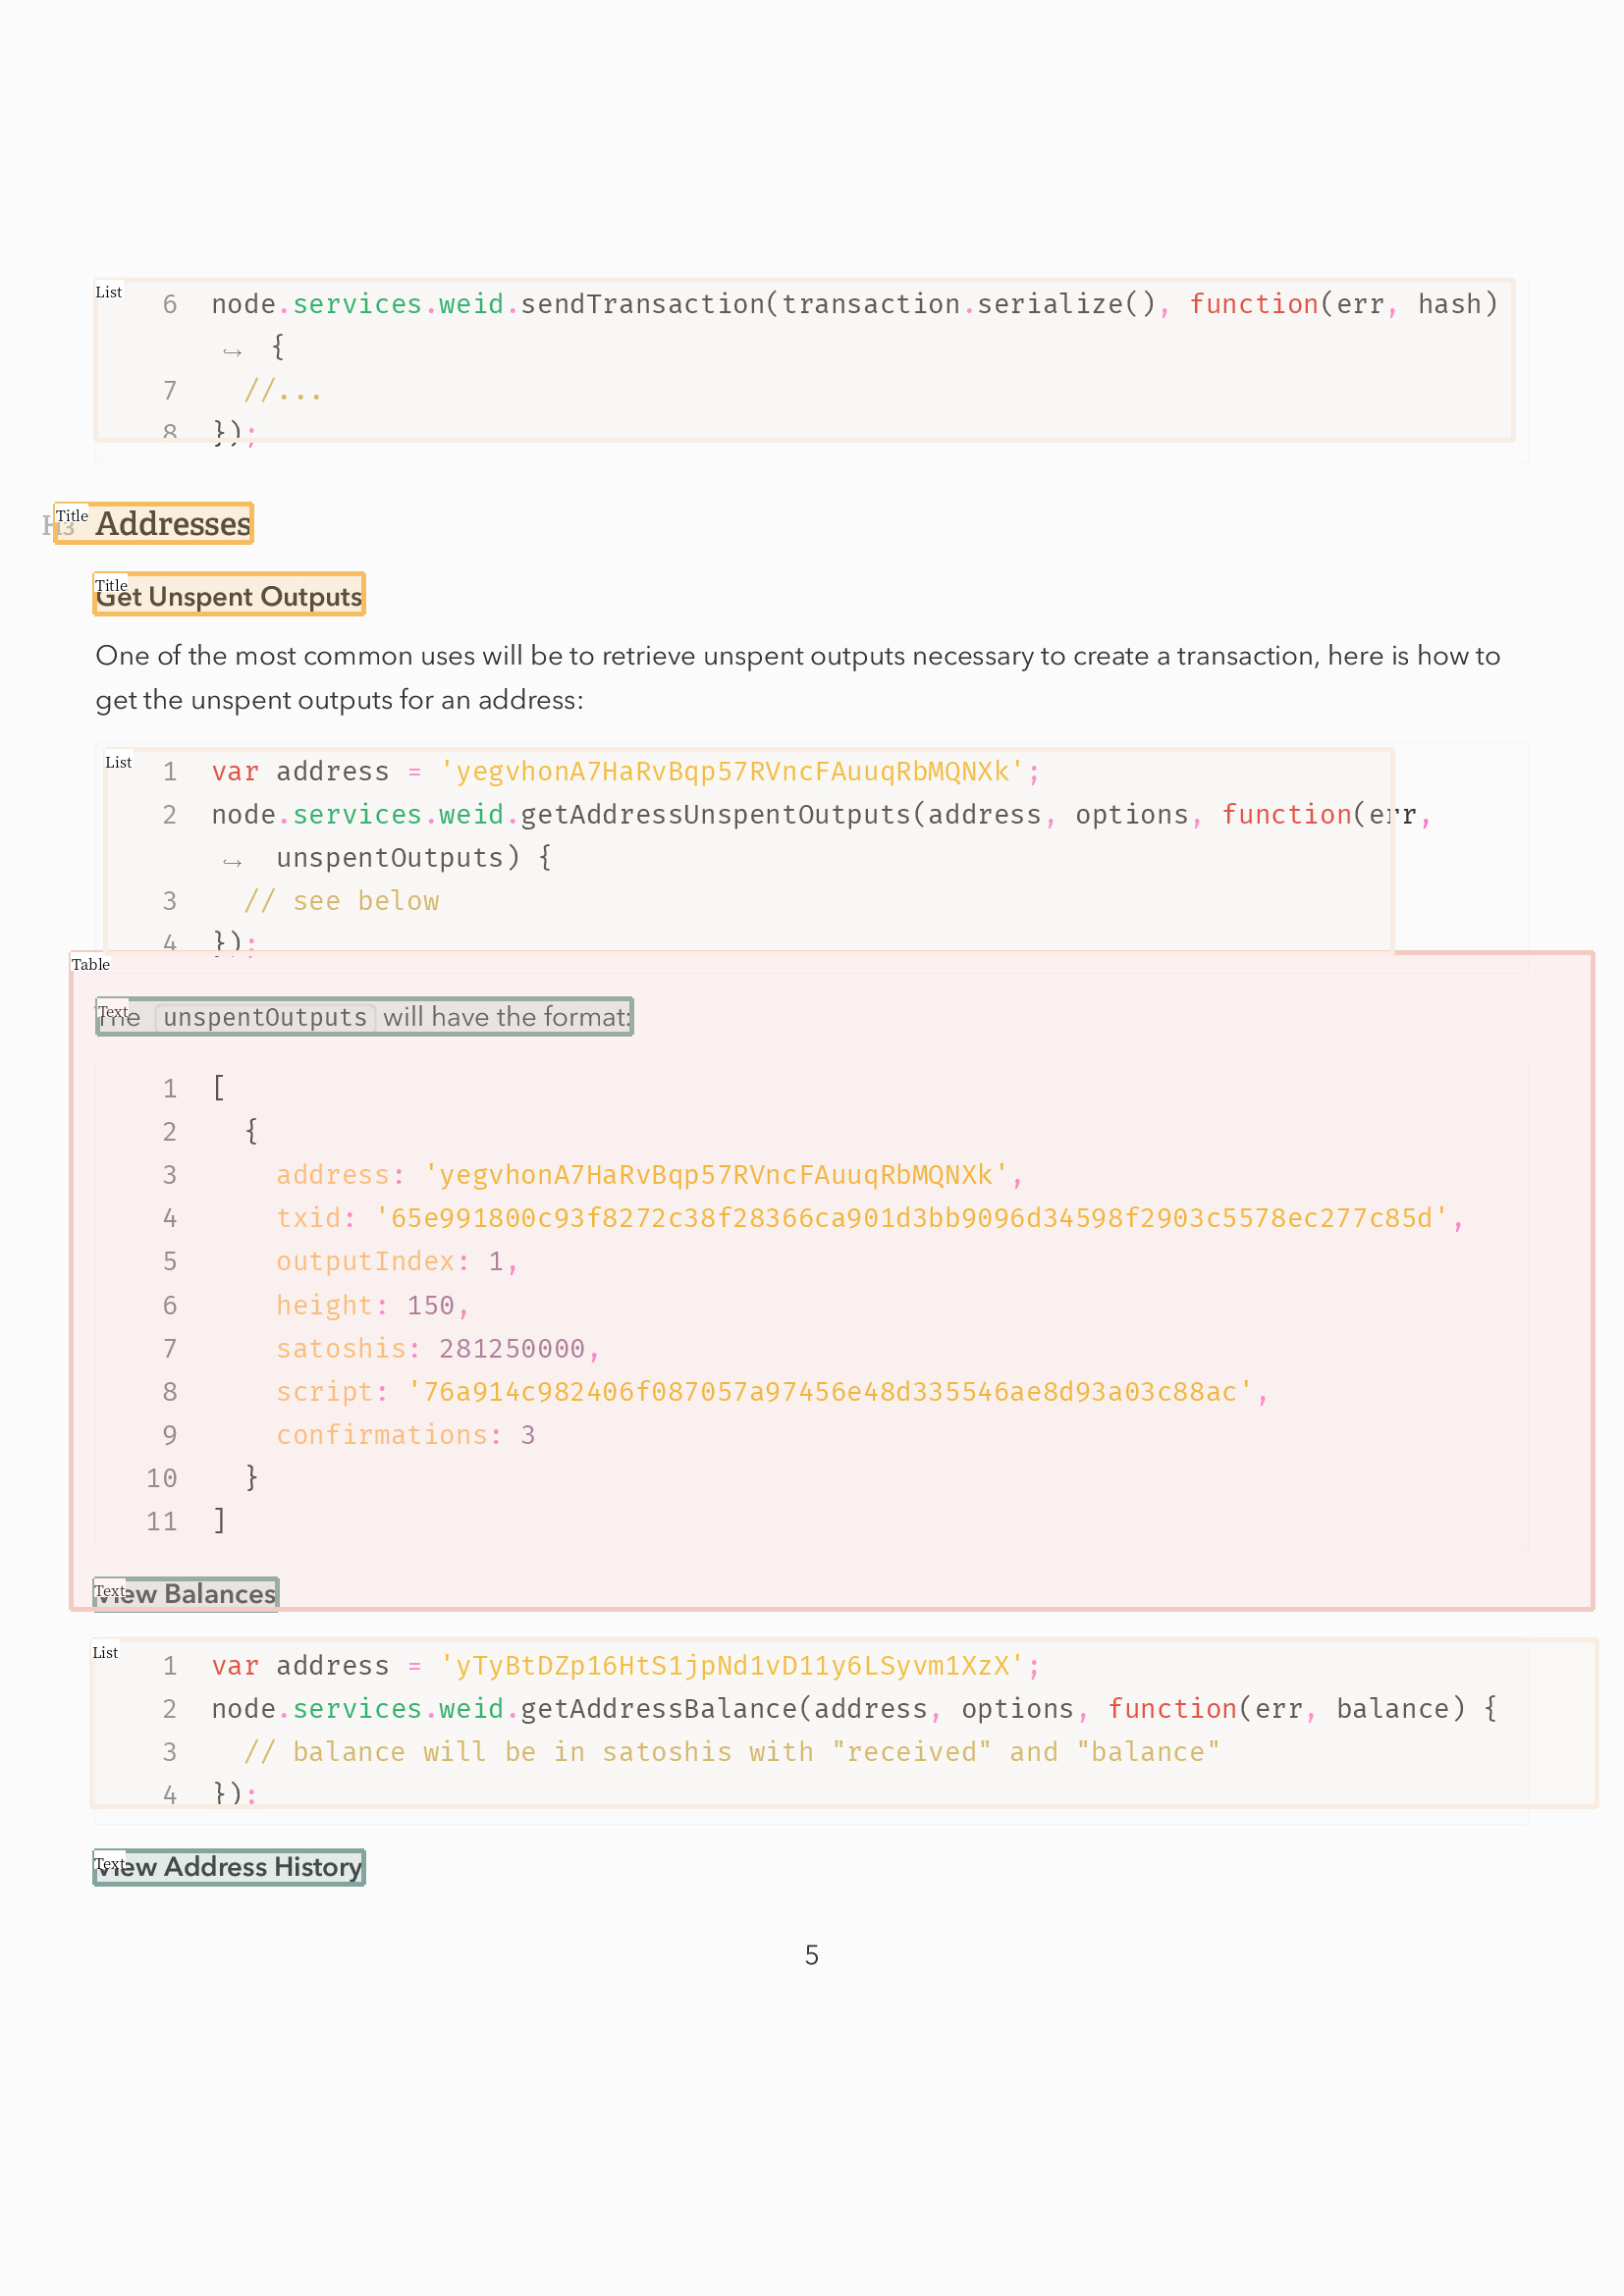

In [31]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,  box_width=5, box_alpha=0.2, show_element_type=True)






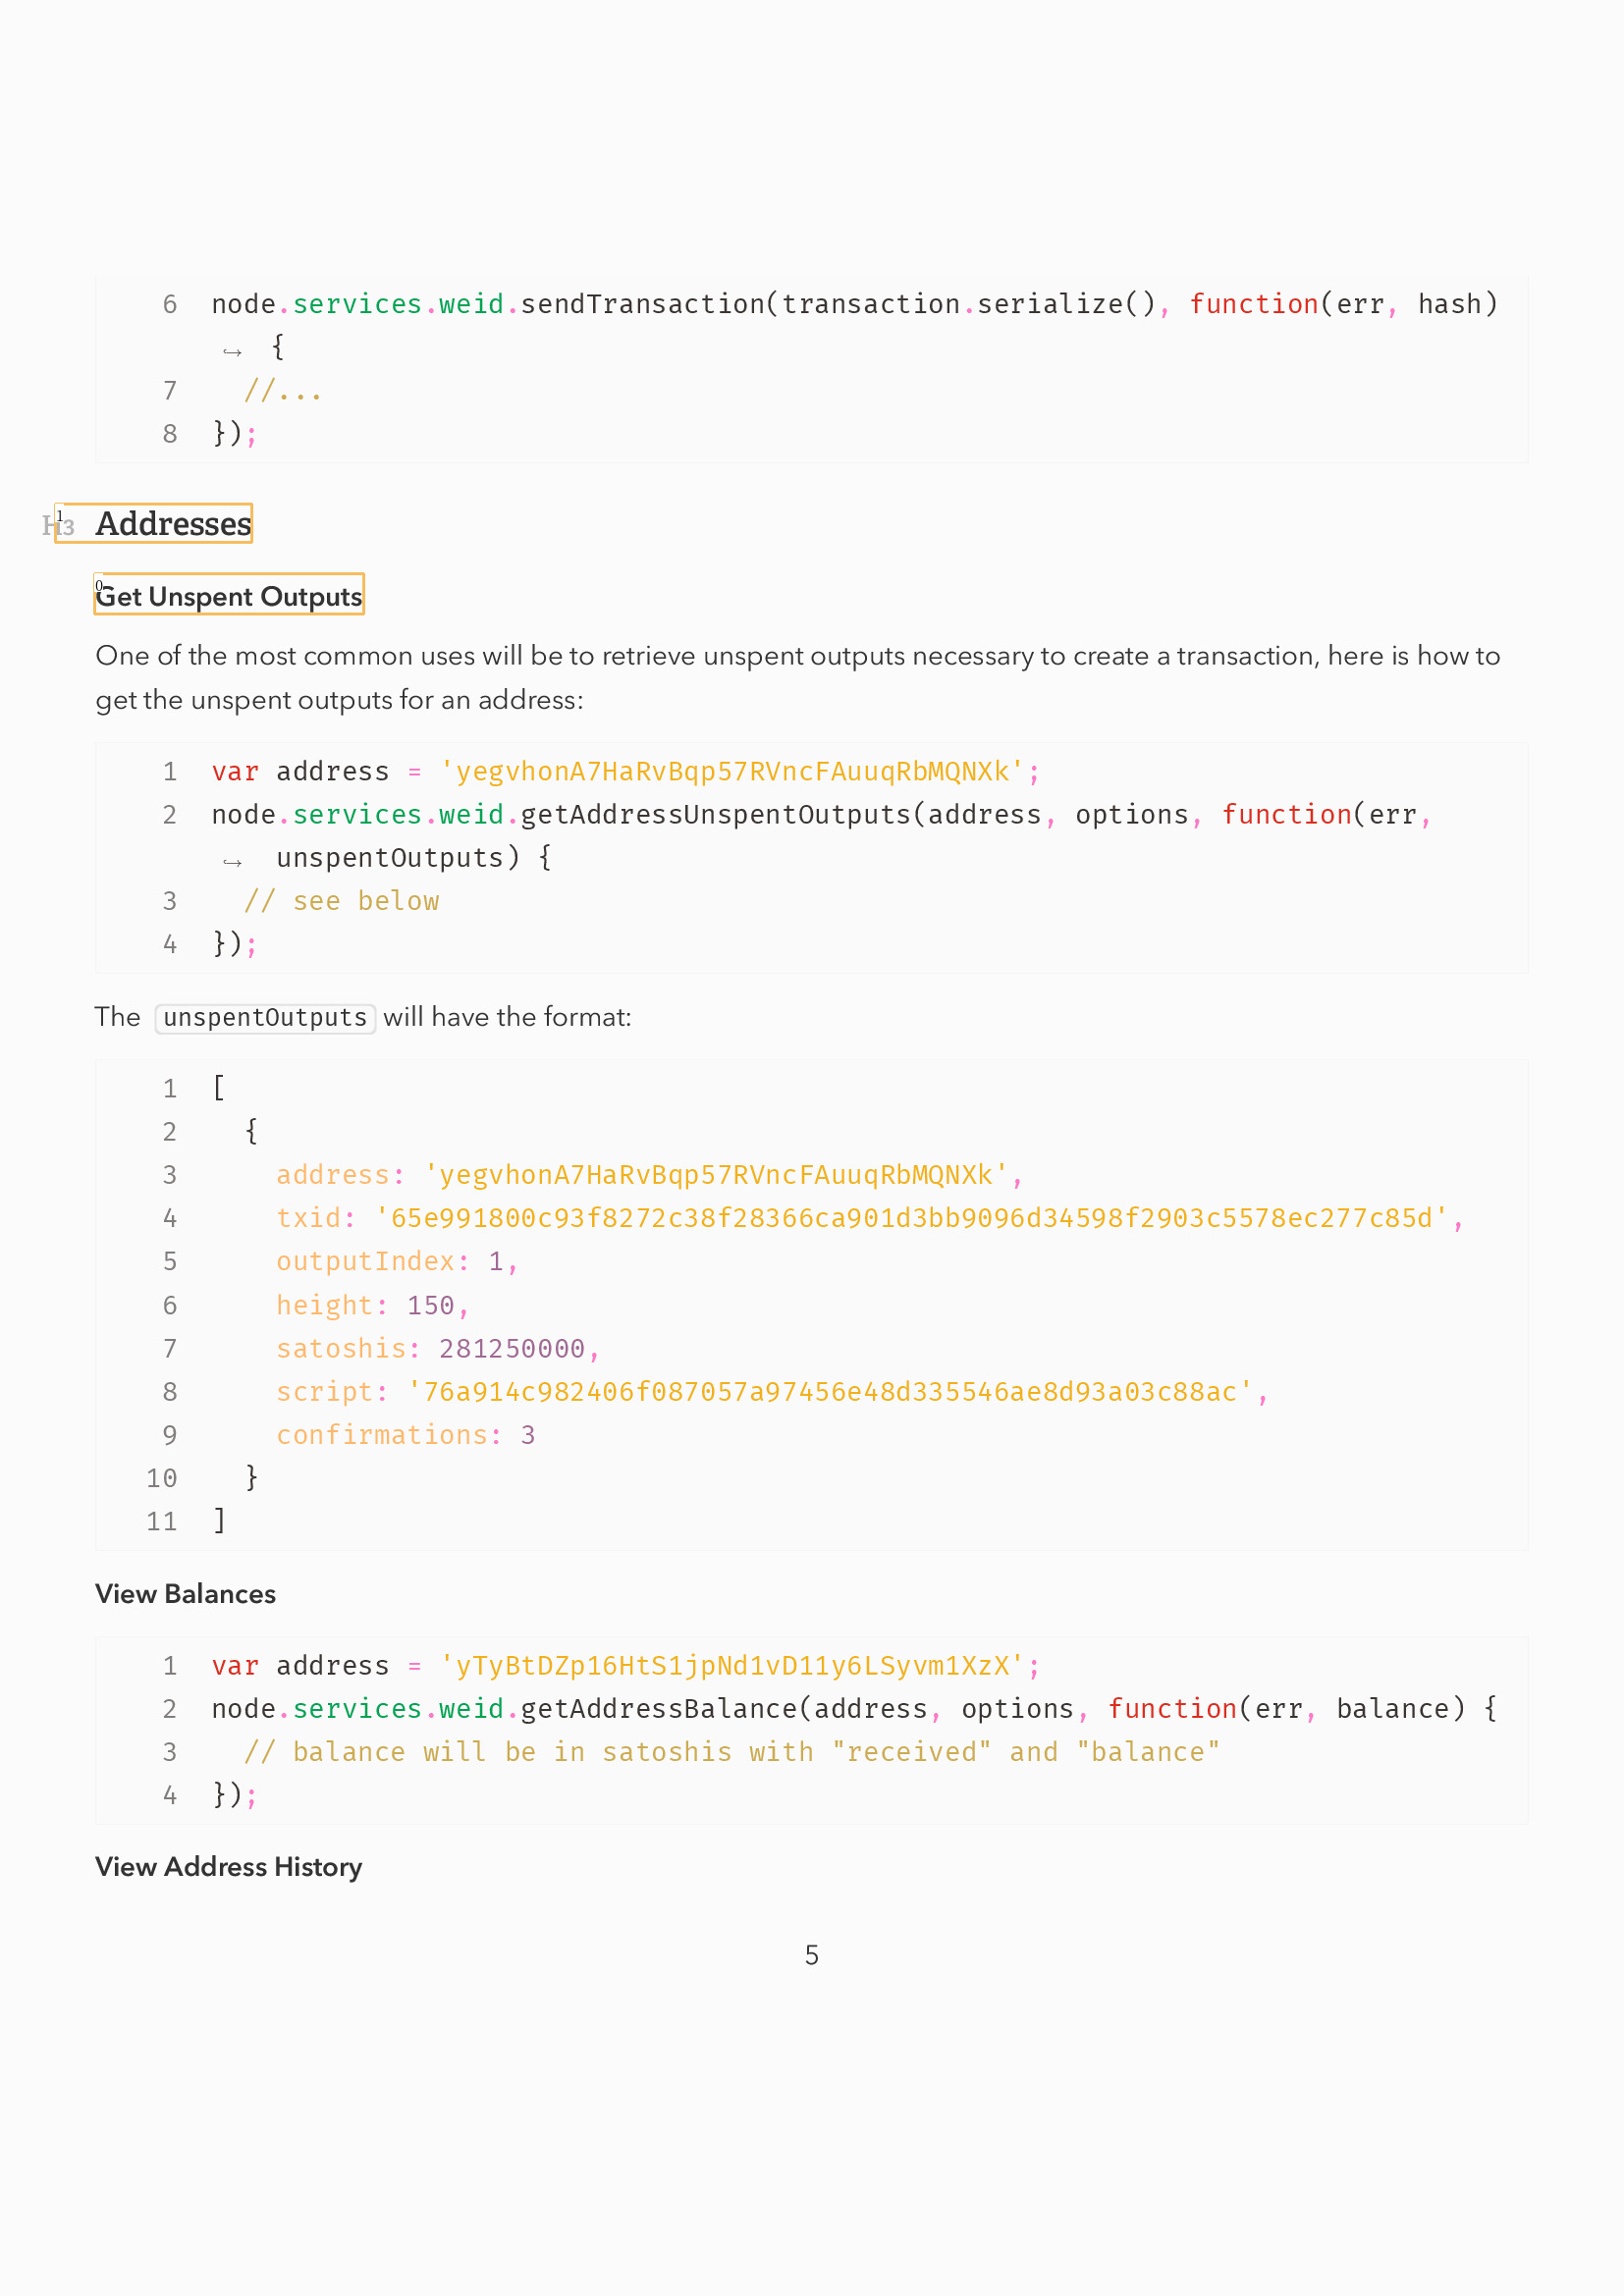

In [32]:
title_blocks = lp.Layout([b for b in layout if b.type=='Title'])
title_blocks

lp.draw_box(image, title_blocks,
            box_width=3,
            show_element_id=True)

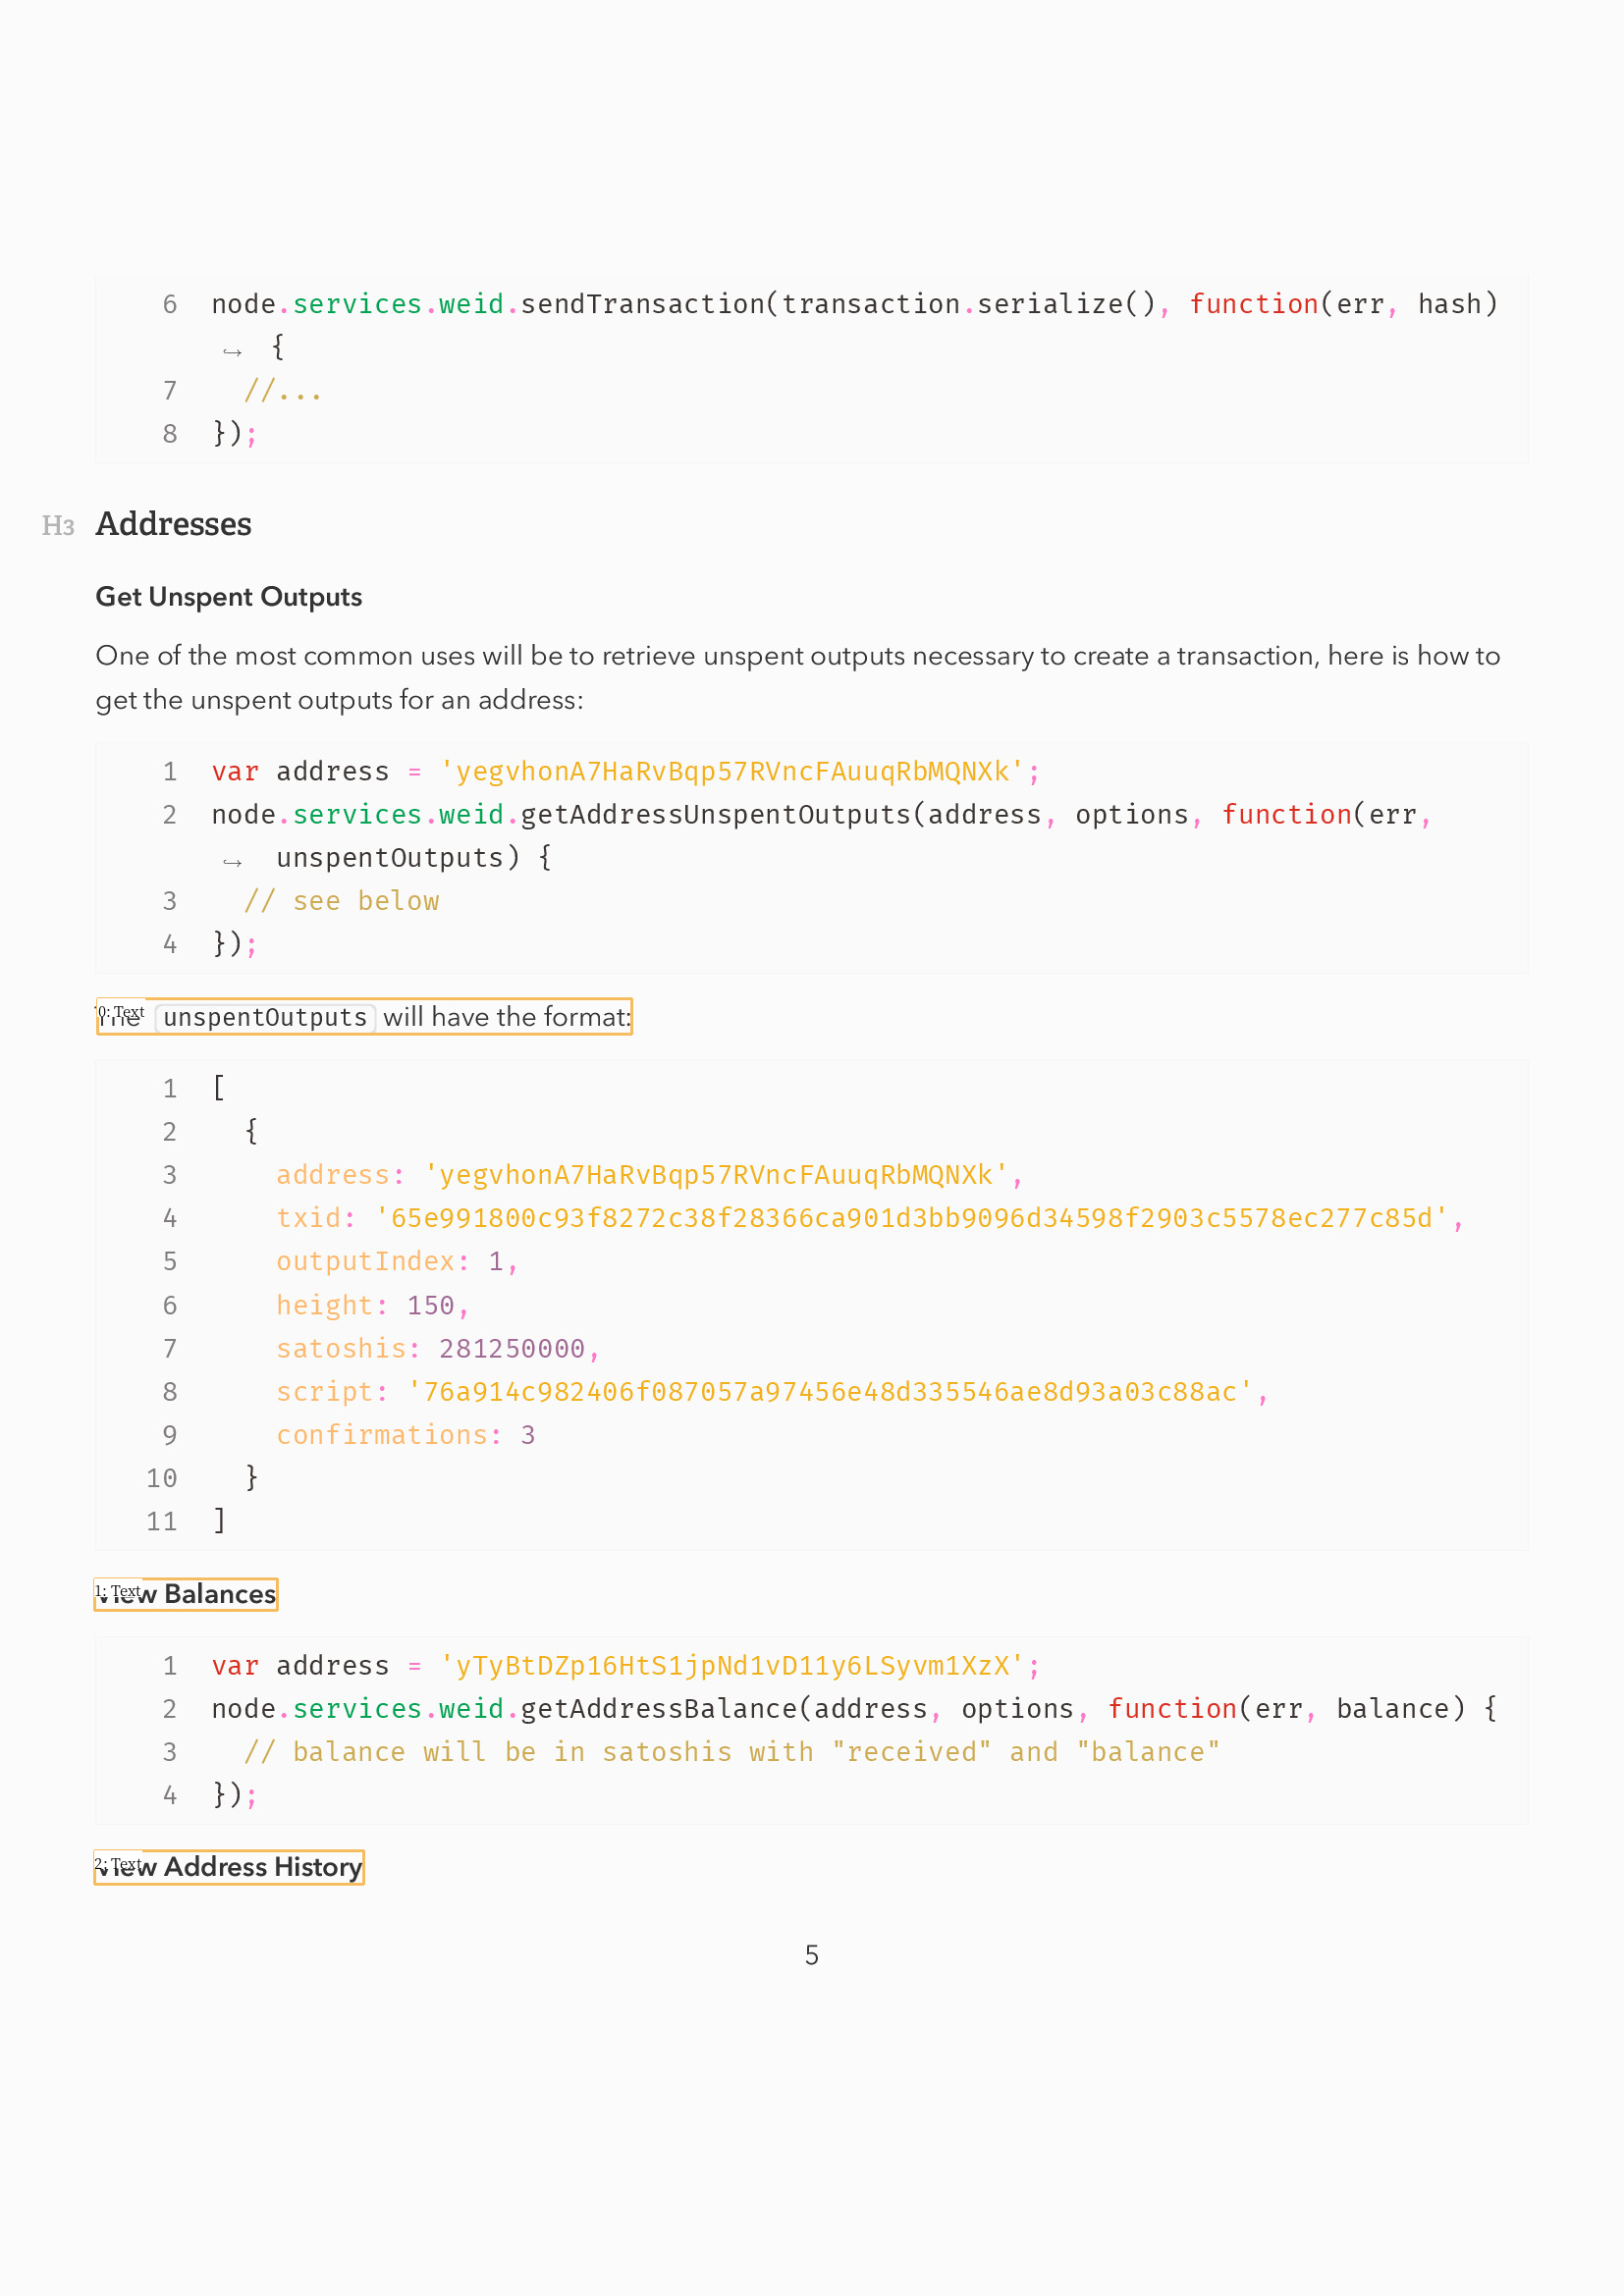

In [33]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])


ord_blocks = text_blocks._blocks
ord_blocks.sort(key = lambda b:b.coordinates[1])

text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(ord_blocks)])

lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_type=True,
            show_element_id=True)

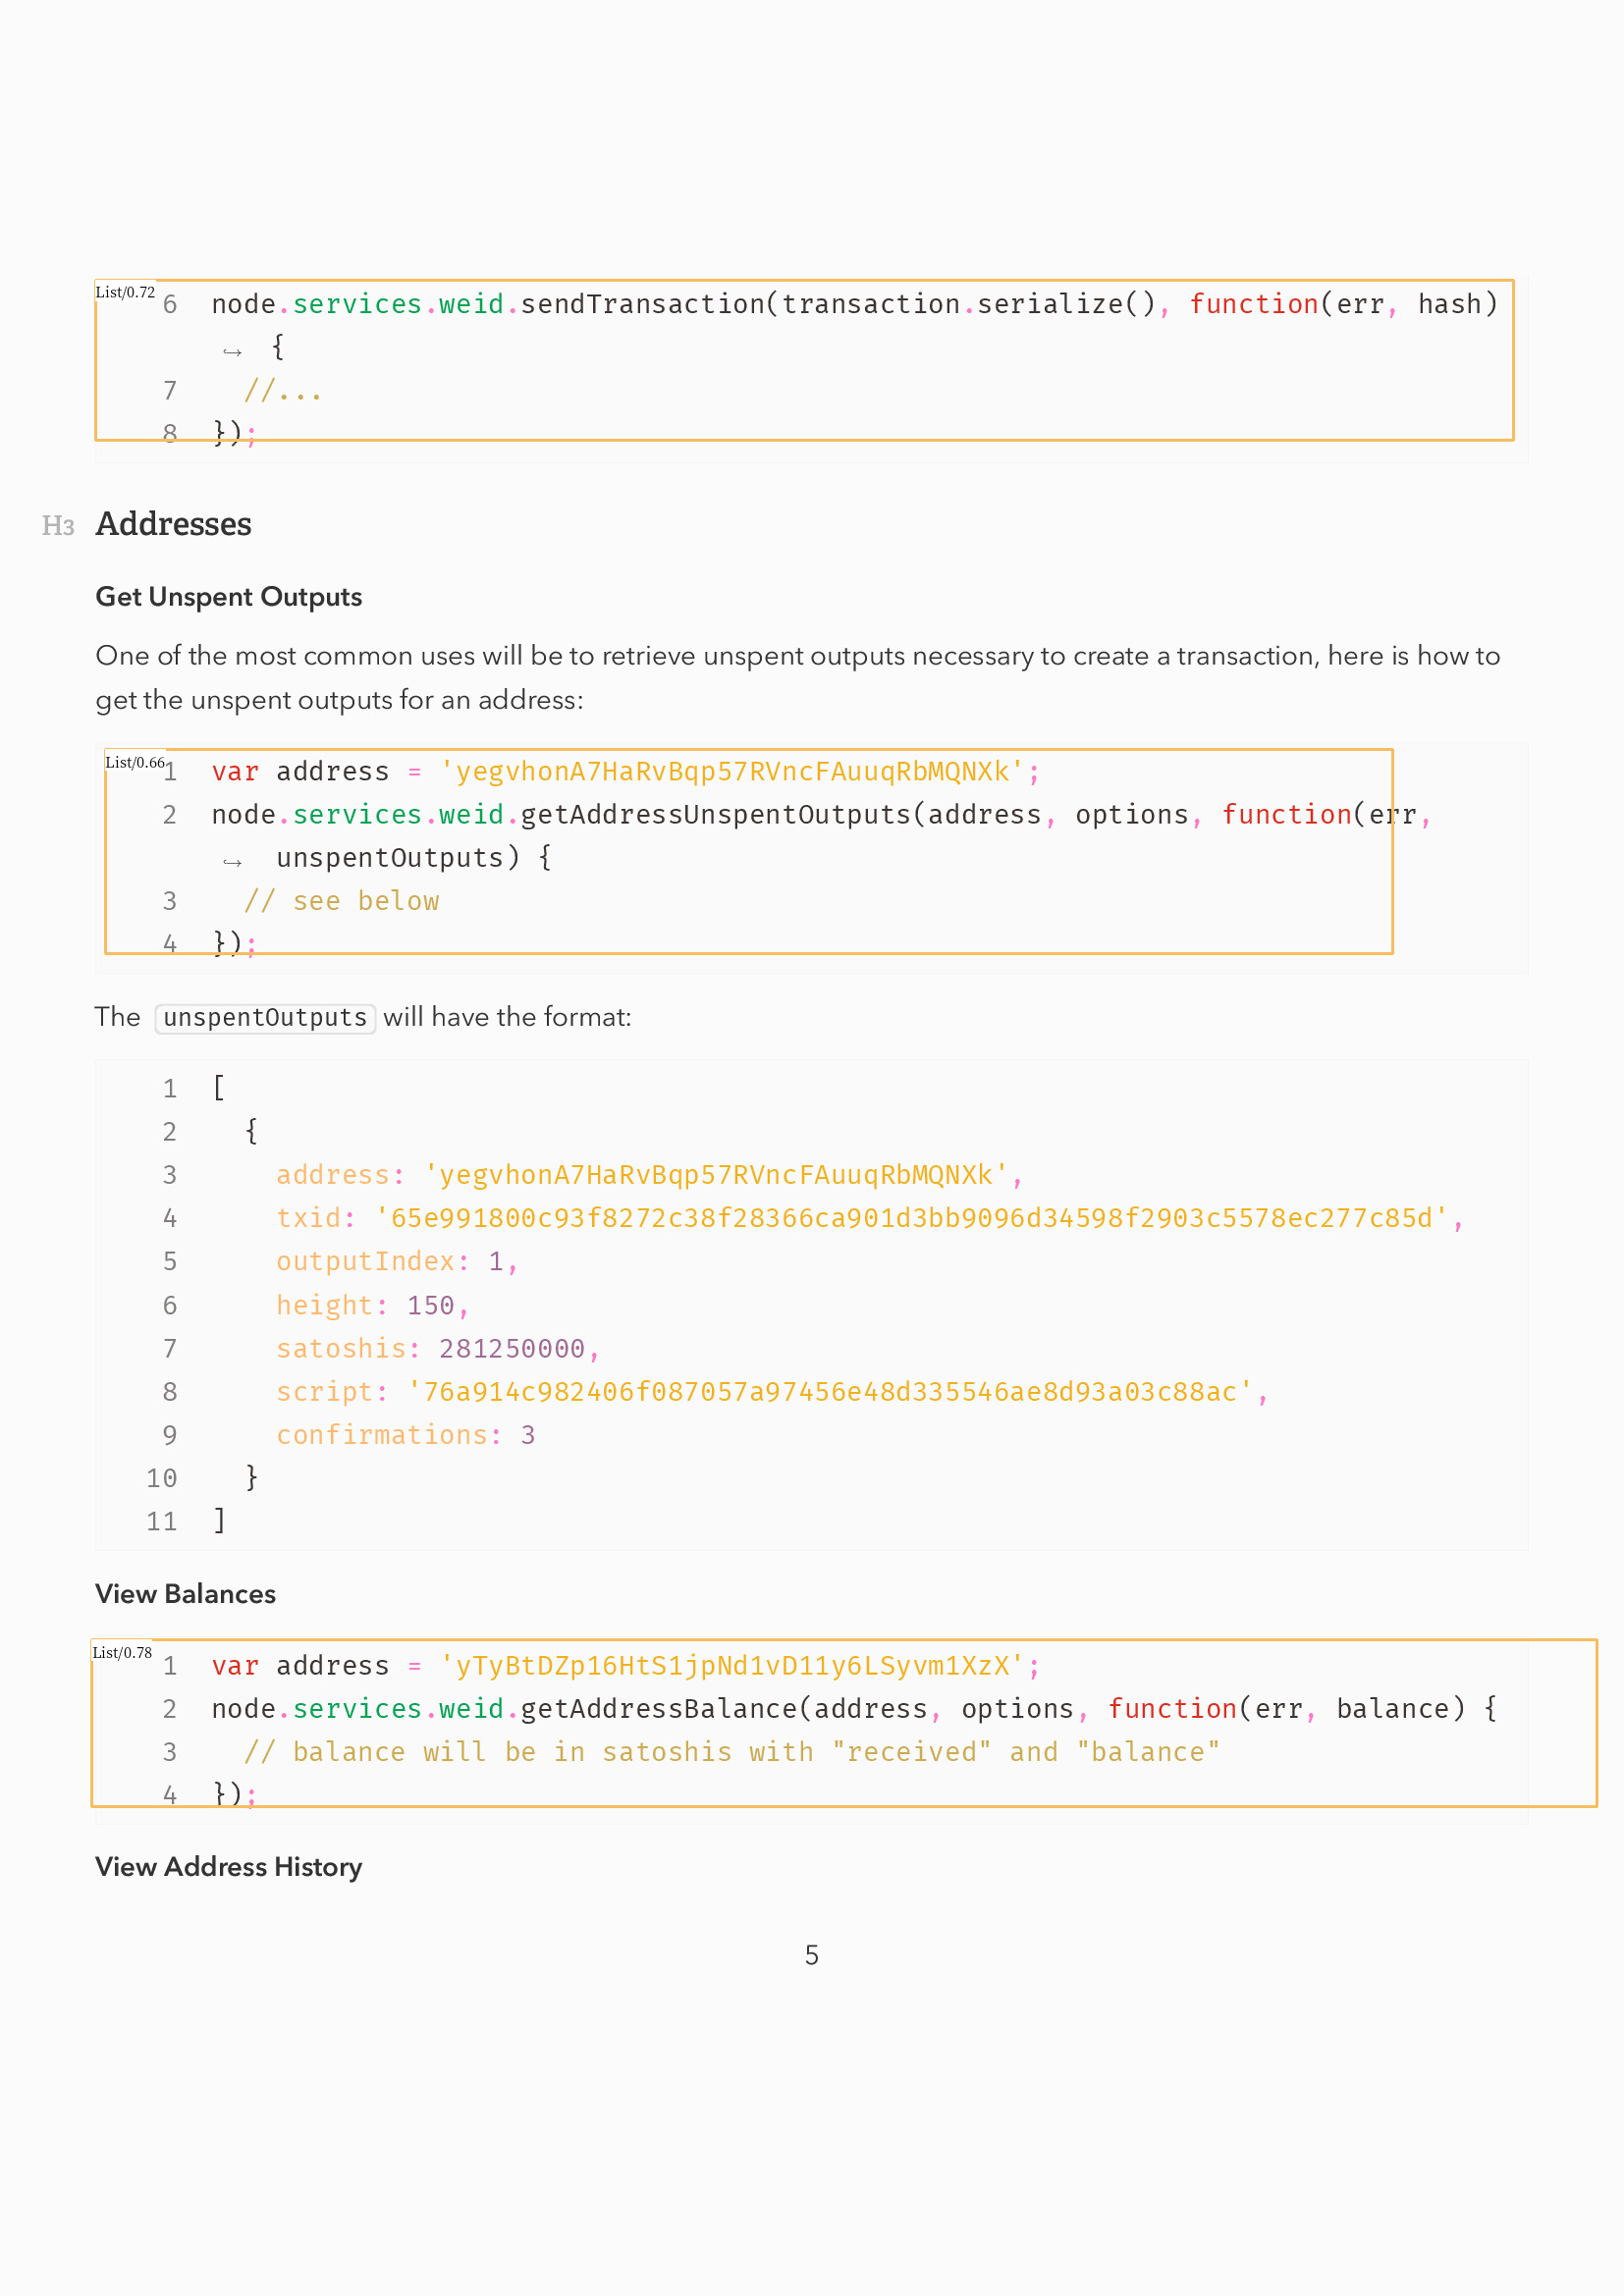

In [34]:
list_blocks = lp.Layout([b.set(id=f'{b.type}/{b.score:.2f}') for b in layout if b.type=='List'])
list_blocks

lp.draw_box(image, list_blocks,
            box_width=3,
            show_element_id=True)

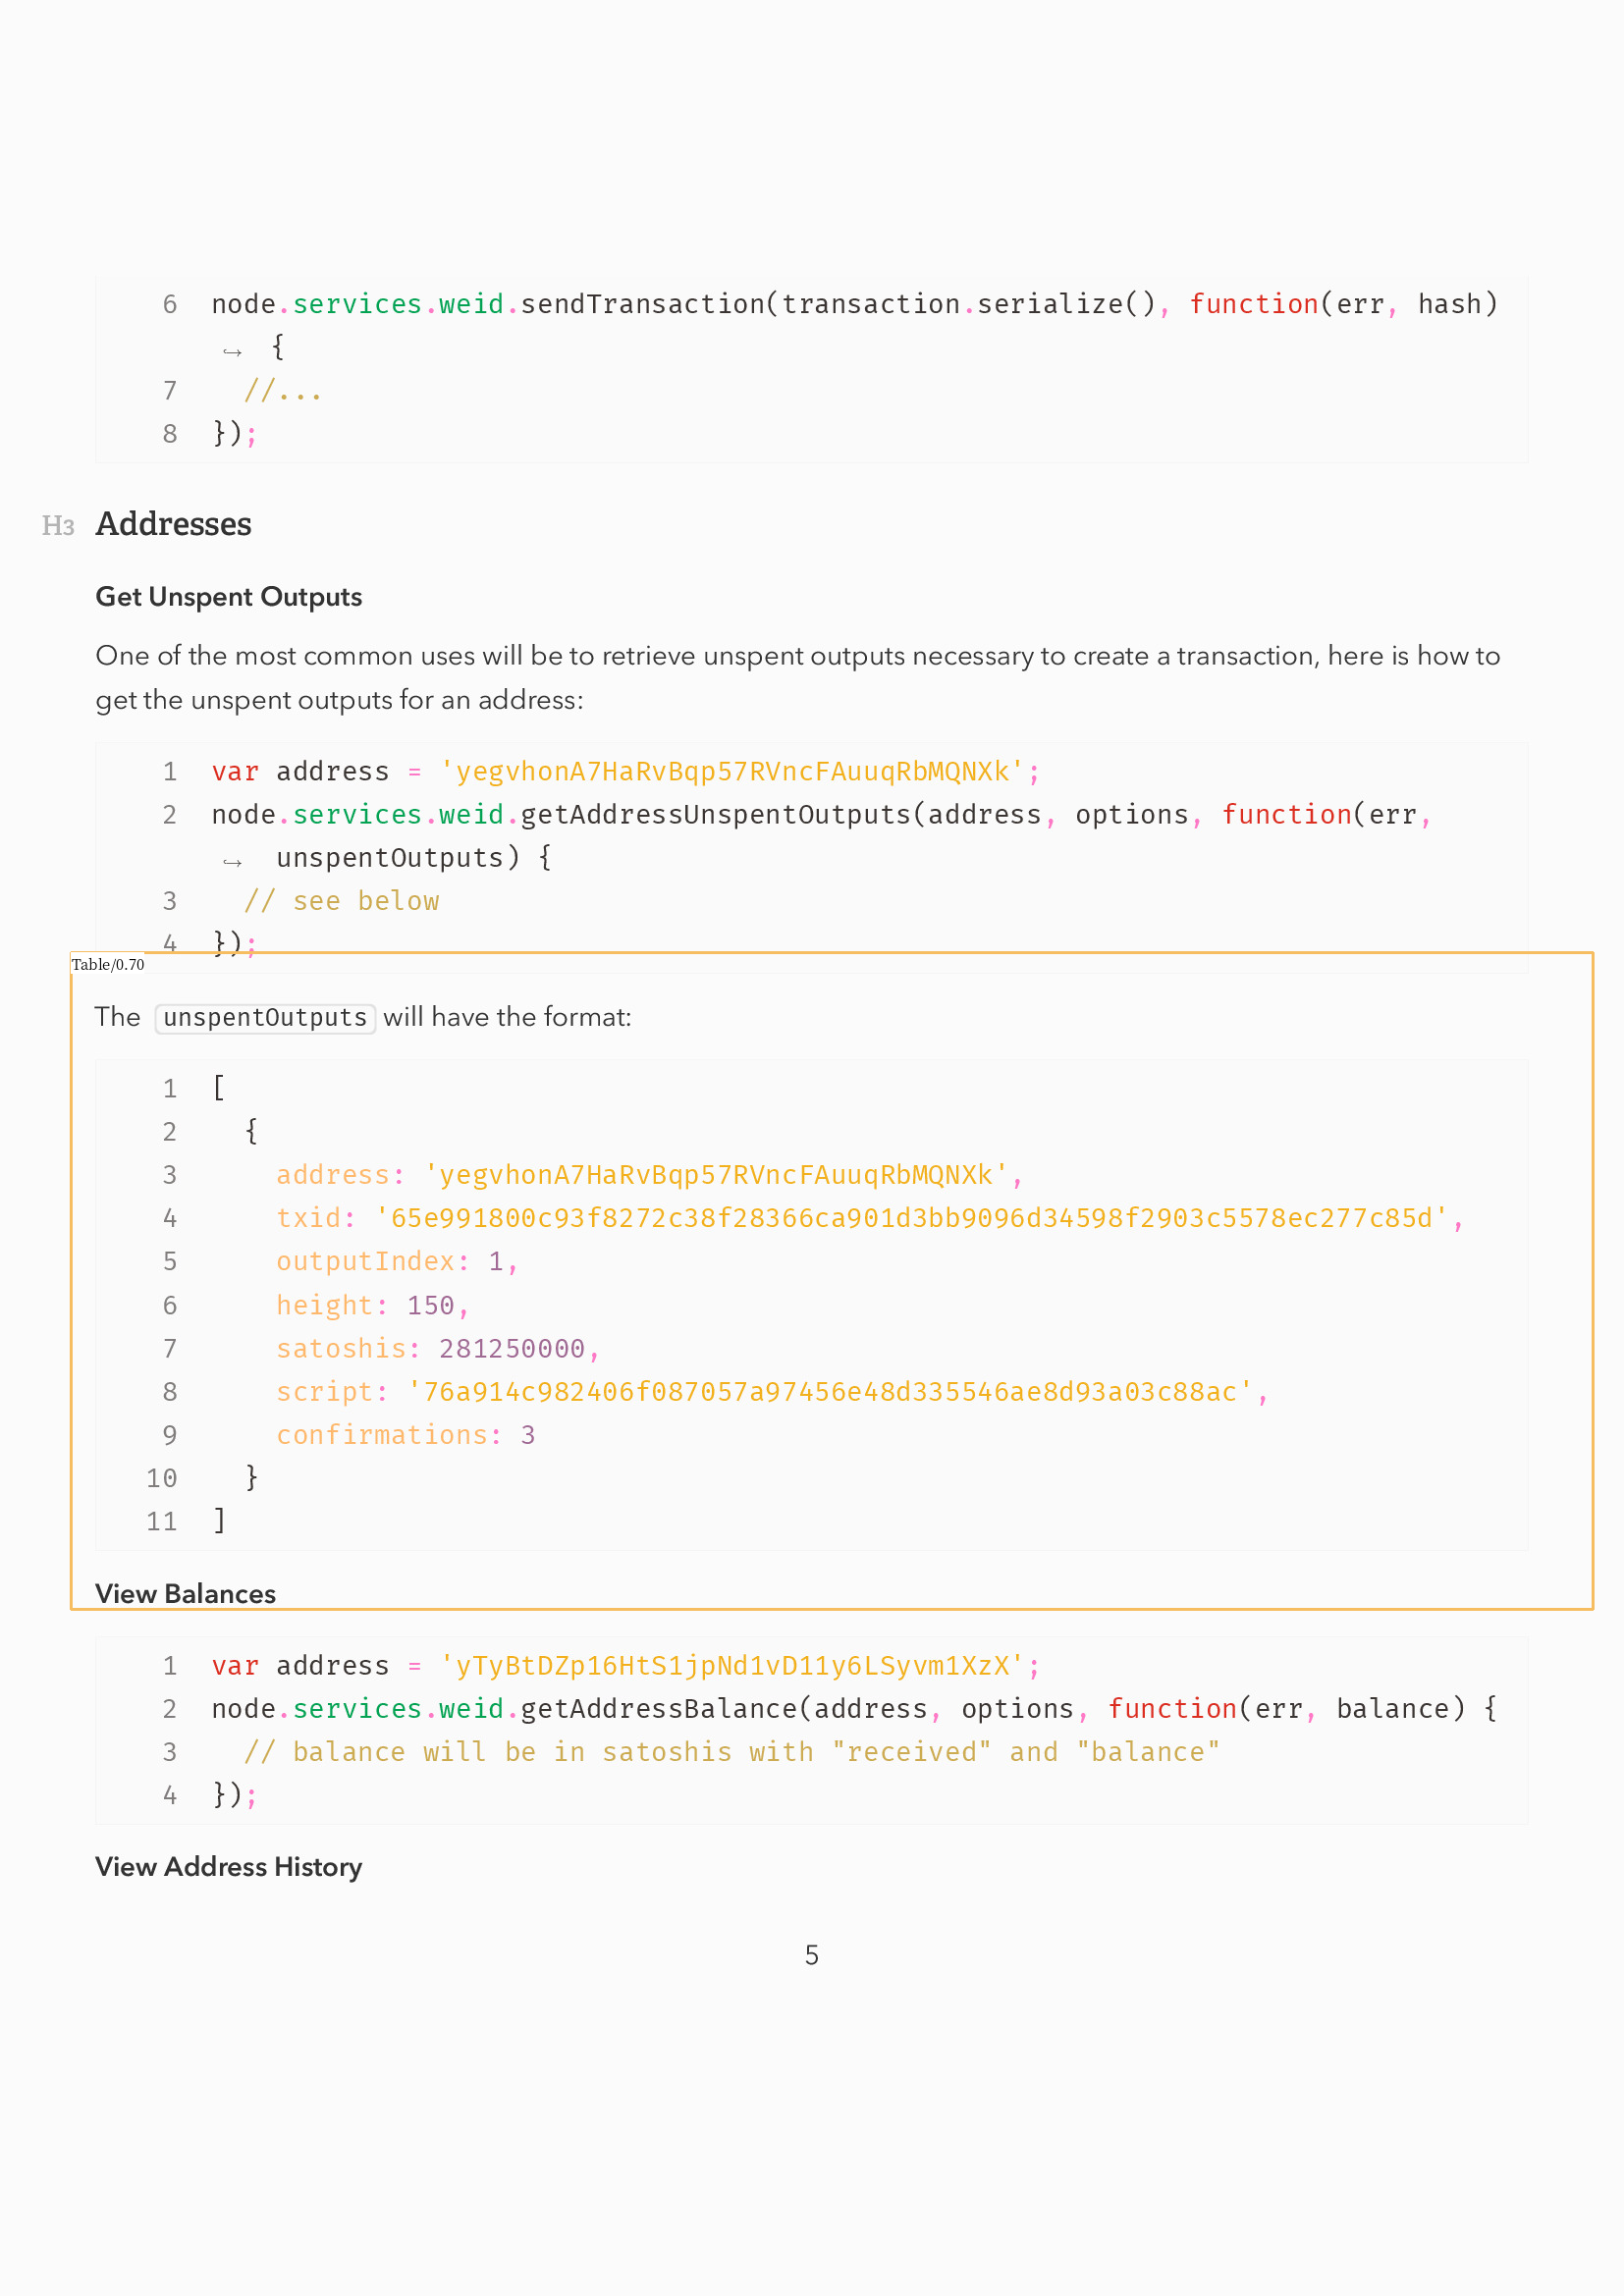

In [35]:
table_blocks = lp.Layout([b.set(id=f'{b.type}/{b.score:.2f}') for b in layout if b.type=='Table'])
table_blocks

lp.draw_box(image, table_blocks,
            box_width=3,
            show_element_id=True)

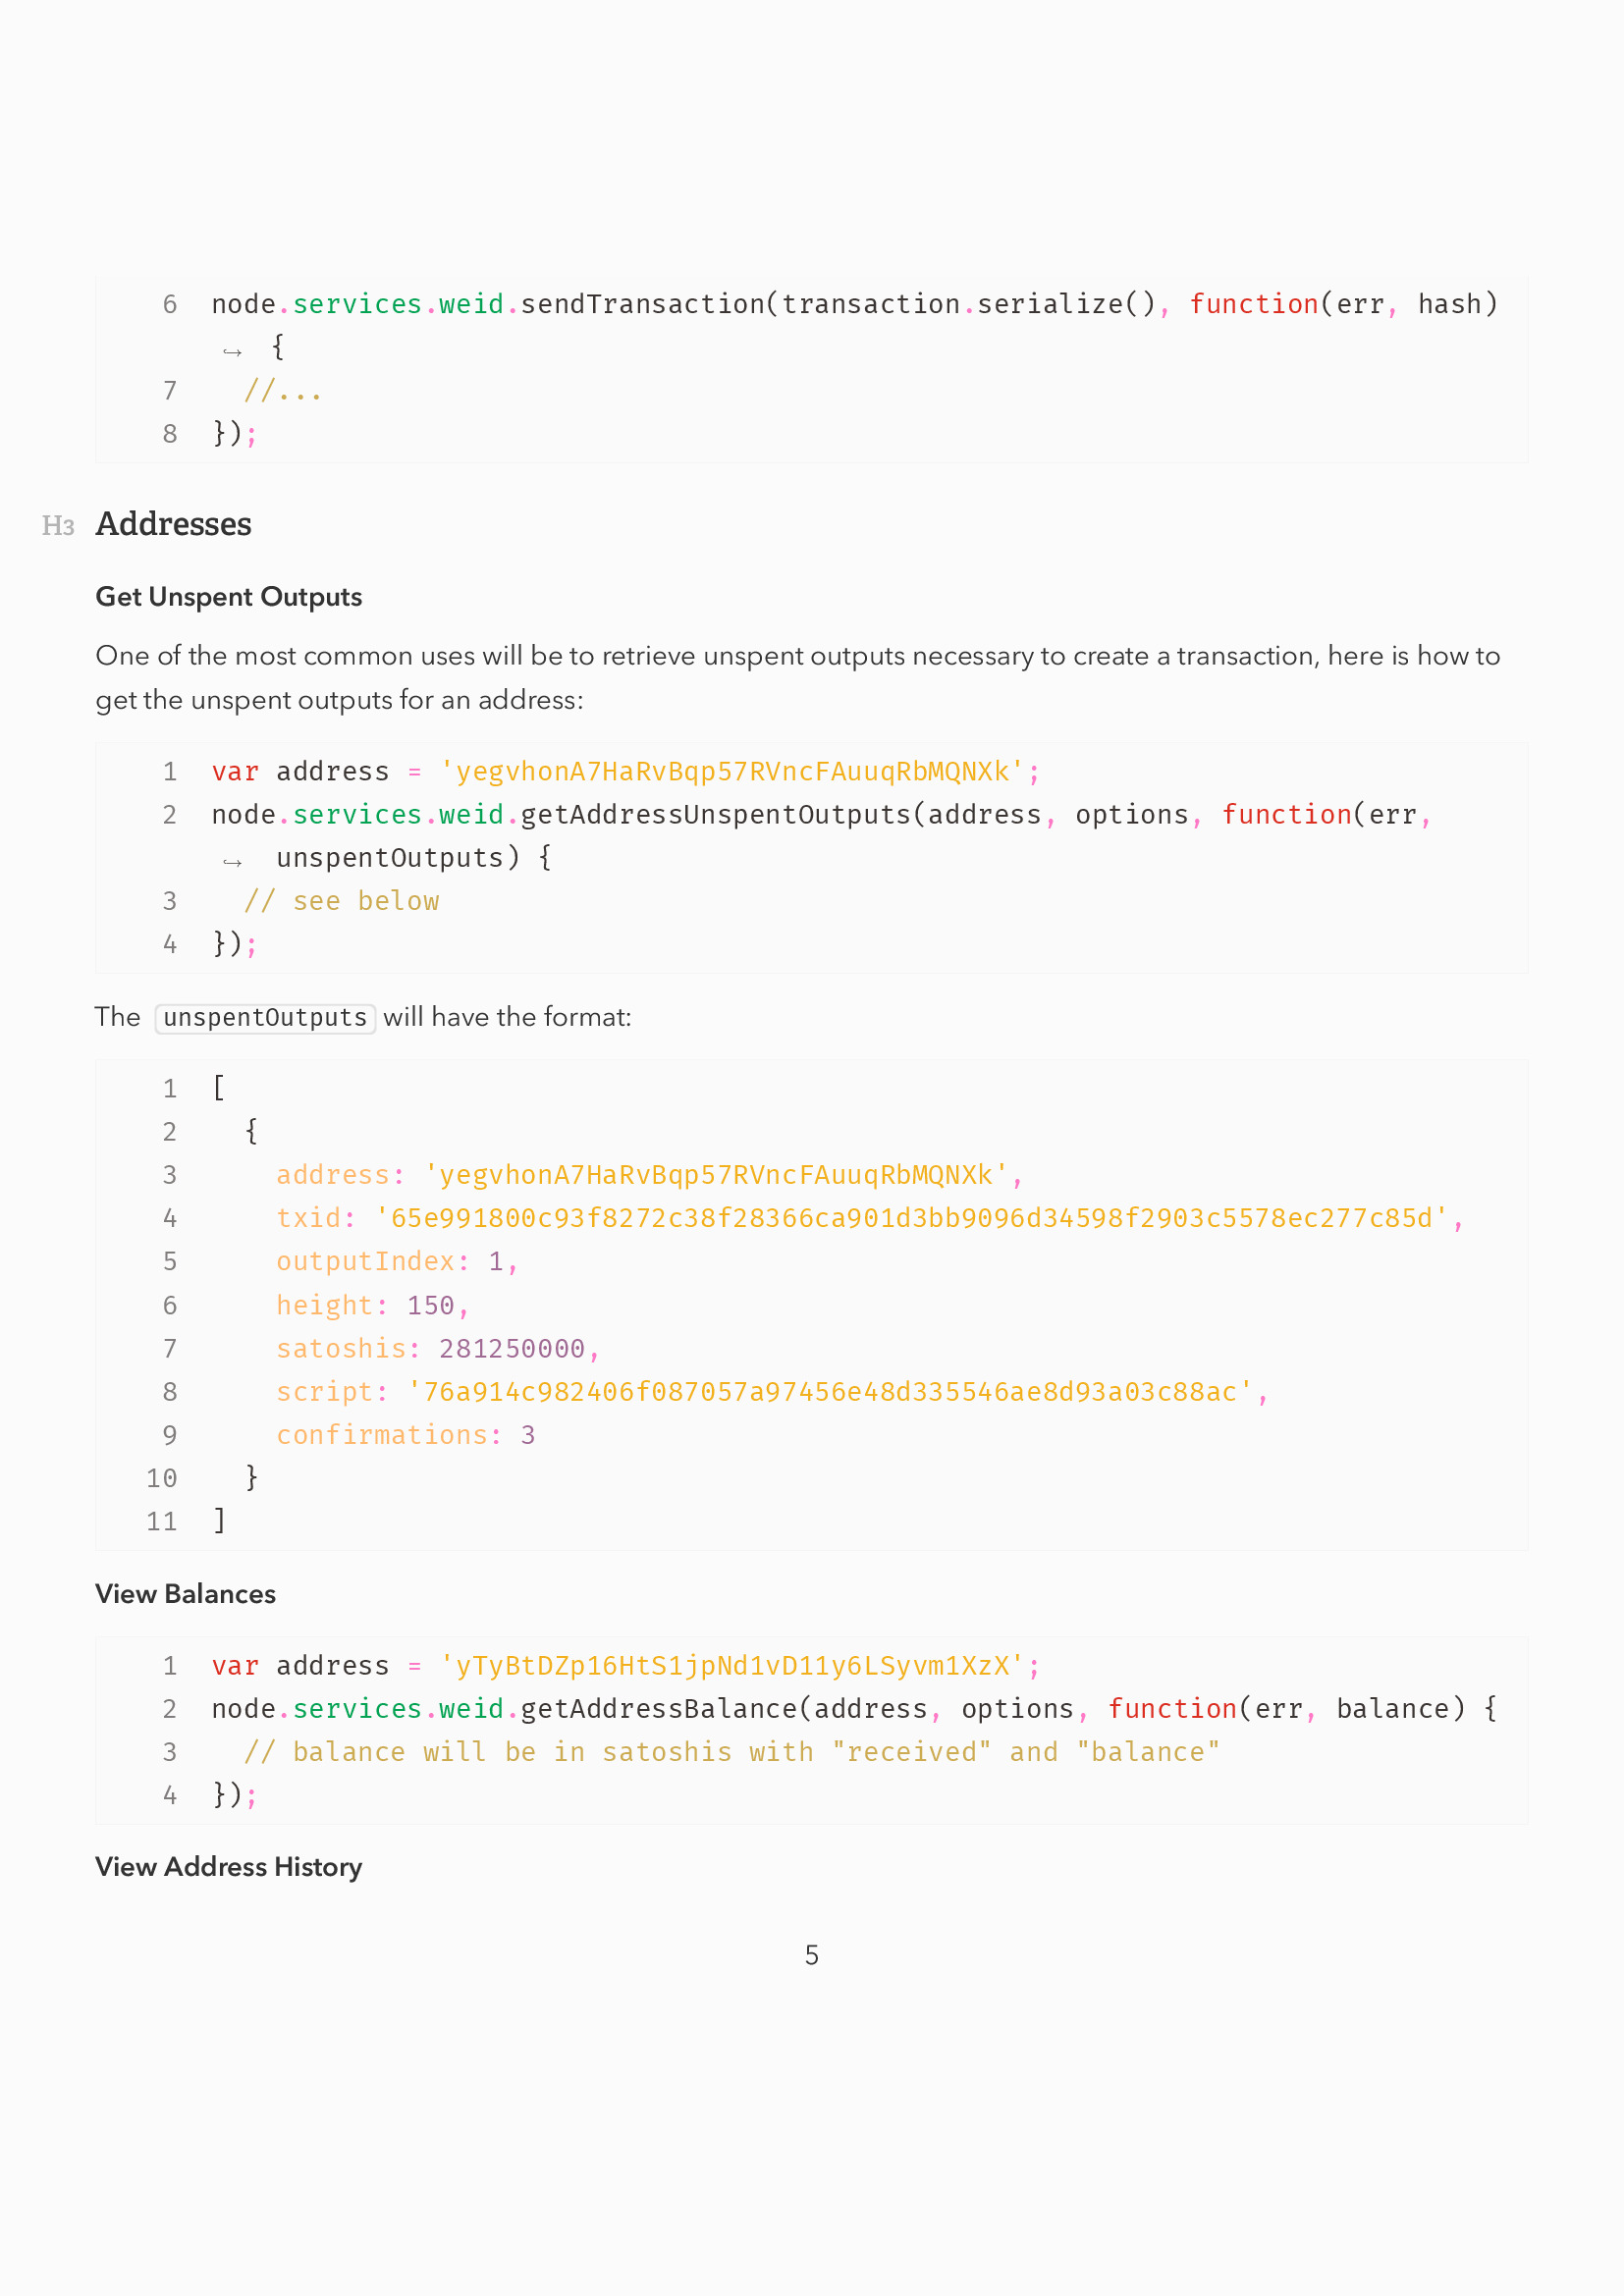

In [36]:
figure_blocks = lp.Layout([b.set(id=f'{b.type}/{b.score:.2f}') for b in layout if b.type=='Figure'])
figure_blocks

lp.draw_box(image, figure_blocks,
            box_width=3,
            show_element_id=True)